### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing the dataset

In [2]:
dataset_path=r"C:\Users\nikhi\Machine_Learning_Practice\dataset\Housing.csv"

In [3]:
house_price_df=pd.read_csv(dataset_path)
house_price_df.head()


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

### data analysis

In [4]:
house_price_df.shape

(545, 13)

In [5]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 40.5+ KB


In [6]:
cols = house_price_df.columns

In [7]:
house_price_df.describe(include ='all')

price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545             545             545   
unique        2         2        2               2               2   
top         yes        no       no              no              no   
freq        468       448      354             520             373   
mean        NaN       NaN      NaN             NaN             NaN   
std         NaN       NaN      NaN             NaN             NaN   
min         NaN       NaN      NaN             NaN             NaN   
25%         NaN       NaN      NaN             NaN             NaN   
50%         NaN       NaN      NaN             NaN             NaN   
75%         NaN       NaN      NaN             NaN             NaN   
max         NaN       NaN      NaN             NaN             NaN   

           parking prefarea furnishingstatus  
count   545.000000      545              545  
unique         NaN        2                3  
top            NaN       no   semi-furnished  
freq           NaN      417              227  
mean      0.693578      NaN              NaN  
std       0.861586      NaN              NaN  
min       0.000000      NaN              NaN  
25%       0.000000      NaN              NaN  
50%       0.000000      NaN              NaN  
75%       1.000000      NaN              NaN  
max       3.000000      NaN              NaN

### Check null

In [8]:
house_price_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The inference we can make after checking for null values and finding that there are no null values in any of the columns is that the dataset is complete in terms of missing values.

Having no null values is beneficial because it allows us to work with the entire dataset without the need for imputation or handling missing data. We can proceed with further data analysis, visualization, and modeling.

## Exploratory Data Analysis

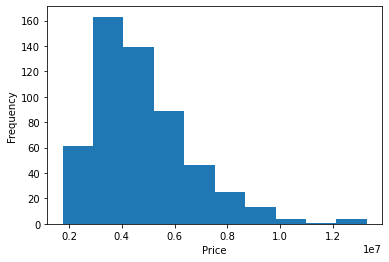

In [9]:
# Histogram of 'price'
plt.hist(house_price_df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

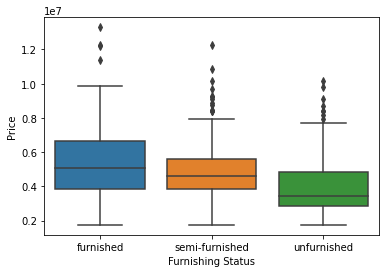

In [10]:
# Box plot of 'price' vs. 'furnishingstatus'
sns.boxplot(x='furnishingstatus', y='price', data=house_price_df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

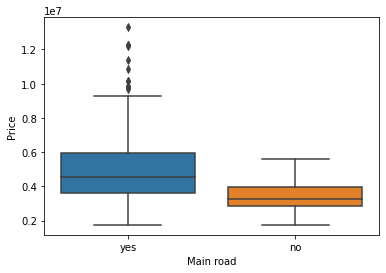

In [11]:
# Box plot of 'price' vs. 'furnishingstatus'
sns.boxplot(x='mainroad', y='price', data=house_price_df)
plt.xlabel('Main road')
plt.ylabel('Price')
plt.show()

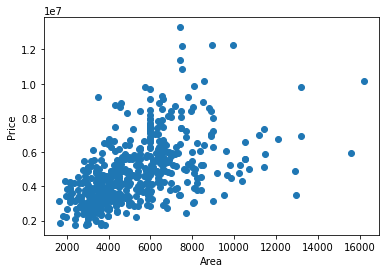

In [12]:
# Scatter plot of 'area' vs. 'price'
plt.scatter(house_price_df['area'], house_price_df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

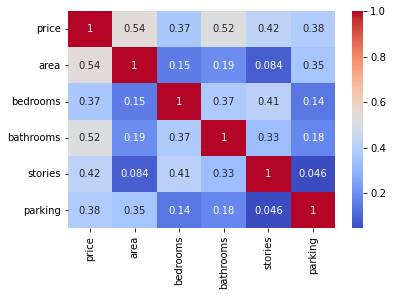

In [13]:
# Heatmap of correlation matrix
correlation_matrix = house_price_df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

### Data Processing 

In [14]:
# List of categorical columns containing 'yes' and 'no' values
yes_no_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [15]:
house_price_df[yes_no_col]

mainroad guestroom basement hotwaterheating airconditioning prefarea
0        yes        no       no              no             yes      yes
1        yes        no       no              no             yes       no
2        yes        no      yes              no              no      yes
3        yes        no      yes              no             yes      yes
4        yes       yes      yes              no             yes       no
..       ...       ...      ...             ...             ...      ...
540      yes        no      yes              no              no       no
541       no        no       no              no              no       no
542      yes        no       no              no              no       no
543       no        no       no              no              no       no
544      yes        no       no              no              no       no

[545 rows x 6 columns]

In [16]:
def yes_no_map(x):
    return x.map({'yes': 1, 'no': 0})

In [17]:
house_price_df[yes_no_col] = house_price_df[yes_no_col].apply(yes_no_map)

In [18]:
house_price_df[yes_no_col]

mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0           1          0         0                0                1         1
1           1          0         0                0                1         0
2           1          0         1                0                0         1
3           1          0         1                0                1         1
4           1          1         1                0                1         0
..        ...        ...       ...              ...              ...       ...
540         1          0         1                0                0         0
541         0          0         0                0                0         0
542         1          0         0                0                0         0
543         0          0         0                0                0         0
544         1          0         0                0                0         0

[545 rows x 6 columns]

In [19]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 53.3+ KB


In [20]:
### furnishingstatus   is not in int format. Need to convert. It is a nominal column. 
# Generate dummy variables for the 'furnishingstatus' column
dummy_col_df = pd.get_dummies(house_price_df['furnishingstatus'])

In [21]:
dummy_col_df

furnished  semi-furnished  unfurnished
0            1               0            0
1            1               0            0
2            0               1            0
3            1               0            0
4            1               0            0
..         ...             ...          ...
540          0               0            1
541          0               1            0
542          0               0            1
543          1               0            0
544          0               0            1

[545 rows x 3 columns]

In [22]:
house_price_df = pd.concat([house_price_df, dummy_col_df], axis=1)

# Display the first few rows of the updated DataFrame
house_price_df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  furnished  semi-furnished  unfurnished  
0        furnished          1               0            0  
1        furnished          1               0            0  
2   semi-furnished          0               1            0  
3        furnished          1               0            0  
4        furnished          1               0            0

In [23]:
house_price_df = house_price_df.drop('furnishingstatus', axis=1)

In [24]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  furnished        545 non-null    uint8
 13  semi-furnished   545 non-null    uint8
 14  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(3)
memory usage: 52.8 KB


### Evaluation Comparing Dataframe

In [25]:
eval_summary_df = pd.DataFrame(columns=['method', 'r2', 'rmse'])
method_list = []
r2_list = []
rmse_list = []

###  Training and Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
inp=house_price_df.drop(['price'], axis=1)
out=house_price_df['price']

In [28]:
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = .30, random_state = 26)

## Regression using Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(inp_train, out_train)

LinearRegression()

In [31]:
model.coef_

array([ 2.48895406e+02,  1.15279297e+05,  1.02149387e+06,  4.05588543e+05,
        3.93575780e+05,  3.35107578e+05,  4.62783540e+05,  1.14869627e+06,
        8.25934681e+05,  3.65117139e+05,  5.75237182e+05,  2.42041717e+05,
        4.31544421e+04, -2.85196159e+05])

In [32]:
model.intercept_

-135046.21067850012

In [33]:
predictions = model.predict(inp_test)
predictions

array([4799181.17342449, 3019407.07840021, 3311152.04042186,
       7865819.22824814, 7153524.40407494, 6995208.64638433,
       2626556.04198349, 4696702.89235569, 2616071.01556945,
       4648668.18348816, 6929106.45760448, 8057448.57003754,
       4515597.29778236, 4266334.75664776, 6303820.33035802,
       4218971.87066091, 4346701.67118754, 4558928.26120285,
       4000062.42864698, 3079354.34608365, 4893918.31478557,
       5051390.97565592, 4474650.55991188, 2742777.77549722,
       1984084.85581919, 3939507.34805848, 3303131.16155414,
       4172598.9532378 , 5641848.15594523, 5820676.5745483 ,
       2636511.85822041, 6581502.43929092, 4405484.40328816,
       3625000.75714788, 3473285.52865305, 5953110.77753055,
       6785763.632734  , 3801665.5497187 , 6419099.62741179,
       3400718.21356634, 5057112.96910126, 8372926.51652638,
       4578063.42957778, 6361223.75636584, 3740391.02331995,
       3110089.57068523, 3434735.30702258, 5702831.79045851,
       6452736.90081796,

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
import math

In [35]:
print('R2 Score: ', round(r2_score(out_test, predictions), 2))
print('Root Mean Sqaure Error: ', round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

R2 Score:  0.65
Root Mean Sqaure Error:  1027676.64


In [36]:
method_list.append('Linear Regression')
r2_list.append(round(r2_score(out_test, predictions), 2))
rmse_list.append(round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

## Regression using Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [38]:
model.fit(inp_train, out_train)

DecisionTreeRegressor()

In [39]:
predictions = model.predict(inp_test)

In [40]:
print('R2 Score: ', round(r2_score(out_test, predictions), 2))
print('Root Mean Sqaure Error: ', round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

R2 Score:  -0.22
Root Mean Sqaure Error:  1909614.01


In [41]:
method_list.append('Decision Tree Regression')
r2_list.append(round(r2_score(out_test, predictions), 2))
rmse_list.append(round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

## Regression using KNN

In [42]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [43]:
model.fit(inp_train, out_train)

KNeighborsRegressor()

In [44]:
predictions = model.predict(inp_test)

In [45]:
print('R2 Score: ', round(r2_score(out_test, predictions), 2))
print('Root Mean Sqaure Error: ', round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

R2 Score:  0.32
Root Mean Sqaure Error:  1428144.07


In [46]:
method_list.append('KNN Regression')
r2_list.append(round(r2_score(out_test, predictions), 2))
rmse_list.append(round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

## Regression using Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [48]:
model.fit(inp_train, out_train)

RandomForestRegressor()

In [49]:
predictions = model.predict(inp_test)

In [50]:
print('R2 Score: ', round(r2_score(out_test, predictions), 2))
print('Root Mean Sqaure Error: ', round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

R2 Score:  0.55
Root Mean Sqaure Error:  1163046.0


In [51]:
method_list.append('Random Forest Regression')
r2_list.append(round(r2_score(out_test, predictions), 2))
rmse_list.append(round(math.sqrt(mean_squared_error(out_test, predictions)), 2))

## Summary

In [52]:
eval_summary_df.method = method_list
eval_summary_df.r2 = r2_list
eval_summary_df.rmse = rmse_list

In [53]:
eval_summary_df

method    r2        rmse
0         Linear Regression  0.65  1027676.64
1  Decision Tree Regression -0.22  1909614.01
2            KNN Regression  0.32  1428144.07
3  Random Forest Regression  0.55  1163046.00

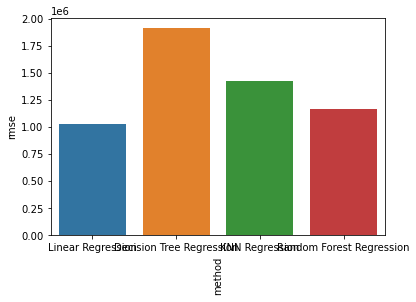

In [56]:
sns.barplot(x='method', y='rmse', data=eval_summary_df)
plt.xlabel('method')
plt.ylabel('rmse')
plt.show()